In [ ]:
!pip install pyinform

     |████████████████████████████████| 131 kB 6.9 MB/s 


In [ ]:
import pandas as pd
import numpy as np
from numpy import genfromtxt

pm = genfromtxt('/content/drive/MyDrive/Delhi_SAGNN_files/Dataset_V4/eju_delhi_pm25.csv', delimiter=',')

In [ ]:
pm

array([[         nan,          nan,          nan, ...,          nan,
                 nan,          nan],
       [         nan, 311.26776009, 754.        , ..., 305.95420412,
        225.84086981, 290.17399202],
       [         nan, 291.25169287, 754.        , ..., 307.35935027,
        224.33434068, 275.42241733],
       ...,
       [         nan, 276.9814186 , 236.        , ..., 174.87608473,
        168.24552481, 210.25580507],
       [         nan, 255.89699048, 167.03222305, ..., 169.75288019,
        166.84090176, 188.40239879],
       [         nan, 162.28520598, 161.71419472, ..., 170.18244086,
        168.42066922, 162.49061643]])

In [ ]:
pm=pm[1:52536,1:]

In [ ]:
pm

In [ ]:
import pandas as pd
pm=pd.DataFrame(pm)

In [ ]:
loc_a

,id,stn_name,lat,lon
0,0,Alipur,28.815329,77.153010
1,1,Anand.Vihar,28.646835,77.316032
2,2,Ashok.Vihar,28.695381,77.181665
3,3,Aya.Nagar,28.470691,77.109936
4,4,Bawana,28.776200,77.051074
5,5,Burari.Crossing,28.725650,77.201157
6,6,CRRI.Mathura.Road,28.551201,77.273574
7,7,Dr..Karni.Singh.Shooting.Range,28.498571,77.264840
8,8,DTU,28.750050,77.111261
9,9,Dwarka,28.571027,77.071901


In [ ]:
loc_a

In [ ]:
from math import radians, cos, sin, asin, sqrt
def dist(lat1, long1, lat2, long2):
    """
Replicating the same formula as mentioned in Wiki
    """
    # convert decimal degrees to radians 
    lat1, long1, lat2, long2 = map(radians, [lat1, long1, lat2, long2])
    # haversine formula 
    dlon = long2 - long1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    # Radius of earth in kilometers is 6371
    km = 6371* c
    return km

In [ ]:
def find_nearest(lat, long):
    distances = loc_b.apply(
        lambda row: dist(lat, long, row['lat'], row['lon']), 
        axis=1)
    return loc_b.loc[distances.idxmin(), 'stn_name']

In [ ]:
loc_b

In [ ]:
loc_b.apply(
    lambda row: find_nearest(row['lat'], row['lon']), axis=0)

KeyError: ignored

In [ ]:
loc_b['name'] = loc_b.apply(
    lambda row: find_nearest(row['lat'], row['lon']), 
    axis=1)# To check the data frame if it has a new column of hotel name (for each and every member's location in the list)members.head()

KeyError: ignored

In [ ]:
import pandas as pd
ar=pd.read_csv('/content/drive/MyDrive/Delhi_SAGNN_files/GNNDelhi/data/stn_coord.csv')
loc_a=pd.DataFrame(ar)
loc_b=pd.DataFrame(ar)
from sklearn.neighbors import BallTree, KDTree
import numpy as np
#bt = BallTree(np.deg2rad(loc_b[['lat', 'lon']].values), metric='haversine')
kd = KDTree(loc_b[['lat', 'lon']].values, metric = 'minkowski')
distances1, indices1 = kd.query(loc_b[['lat', 'lon']],k=7)
all_stn_ind=[]
for i in range(38):
  # print(Hour_3_sample[i,:,:].shape)
  j=indices1[i]
  print(j)
  all_stn_ind.append(np.expand_dims(j,0))
all_stn_ind=np.concatenate(all_stn_ind,axis=0)
  #each_stn=[]
  # for l in j:
  #   # print(l)
  #   # print(Hour_3_sample[:,l,:].shape)
  #   each_stn.append(ar['MAE'].iloc[[l]])
  # each_stn=np.concatenate(each_stn,axis=-1)
  # # print(each_stn.shape)
  # all_stn.append(each_stn)

[ 0 21  8 14 31  5  4]
[ 1 36 10 12 26 13 17]
[ 2 37  5 14 23 29 30]
[ 3 11 35  9 27 33  7]
[ 4  8 21 31 19  0 14]
[ 5 14  2 37 34 23 31]
[ 6 25 22 15  7 33 16]
[ 7 25  6 22 33 35 15]
[ 8 31 14  4 21 37 19]
[ 9 11 24 28  3 32 19]
[10 12  1 26 36 13 17]
[11  9 27 35 28  3 32]
[12 36 10  1 26 34 13]
[13 17 26 10 16 18 15]
[14  5 37  2 31  8 30]
[15 16 22 17 33  6 27]
[16 15 17 22 33 13 27]
[17 16 13 15 18 22 26]
[18 29 17 23 13 16 28]
[19 30 31  8 32 28 23]
[20 24  9 19 11  3 30]
[21  0  4  8 31 14 37]
[22 15  6 16 33 25 17]
[23 32 29 28 30 37  2]
[24  9 19 11 20 28 30]
[25  6  7 22 33 15 16]
[26 10  1 13 17 36 12]
[27 33 35 16 15 22 11]
[28 32 29 23 30 18 37]
[29 23 32 28 18 30  2]
[30 32 23 28 37 29  2]
[31  8 14 37 30 19  2]
[32 28 23 29 30 37  2]
[33 27 35 15 22 16  6]
[34  5 12 10  2 36 13]
[35 33 27 15 22 16 11]
[36 12  1 10 26 34 13]
[37  2 14 23 30  5 32]


In [ ]:
a=pm.corr(method ='pearson')

In [ ]:
a.to_csv("corr.csv")

In [ ]:
all_stn_ind.shape

(38, 7)

In [ ]:
n=all_stn_ind[2][0]
n

2

In [ ]:
n=all_stn_ind[0]
n

array([ 0, 21,  8, 14, 31,  4,  5])

In [ ]:
a[n].iloc[0]

0     1.000000
21    0.882910
8     0.937890
14    0.921512
31    0.876225
4     0.991931
5     0.827465
Name: 0, dtype: float64

In [ ]:
n=all_stn_ind[0]
corrnew=a[all_stn_ind[0]]
corrnew.shape

(38,)

In [ ]:
corr_list=[]
for i in range(0,38):
  corrnew=a[all_stn_ind[i]].iloc[i]
  print(corrnew.shape)
  corr_list.append(np.expand_dims(corrnew,0))
corr_list=np.concatenate(corr_list,0)

(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)
(7,)


In [ ]:
corr_list.shape

(38, 7)

In [ ]:
corr_list=pd.DataFrame(corr_list)
corr_list.to_csv("St-wise_corr_list.csv")

In [ ]:
from pyinform import mutual_info
# mutual_info(pm[:,0], pm[:,3])

In [ ]:
corr=np.zeros((38,38))
for i in range(38):
  for j in range(38):
    corr[i,j]=mutual_info(pm[:,i], pm[:,j])

In [ ]:
corr

array([[7.48907727, 2.08257488, 1.3139986 , ..., 1.79140707, 2.01248026,
        1.88800362],
       [2.08257488, 8.23682473, 1.39341887, ..., 1.92437987, 1.90516348,
        2.15840729],
       [1.3139986 , 1.39341887, 7.01062821, ..., 1.1168411 , 1.10536743,
        1.19098119],
       ...,
       [1.79140707, 1.92437987, 1.1168411 , ..., 7.60573589, 2.20373633,
        1.70362111],
       [2.01248026, 1.90516348, 1.10536743, ..., 2.20373633, 7.28105981,
        1.72470502],
       [1.88800362, 2.15840729, 1.19098119, ..., 1.70362111, 1.72470502,
        7.77500966]])

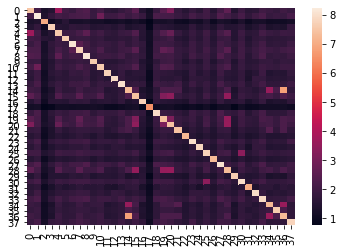

In [ ]:
import seaborn as sns
import pandas as pd
corr=pd.DataFrame(corr)
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [ ]:
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
from scipy.spatial.distance import squareform

In [ ]:
X = [[i] for i in [2, 8, 0, 4, 1, 9, 9, 0]]

In [ ]:
labels = fcluster(Z, 1.24, criterion='distance')
labels

array([32, 11, 15, 29, 33, 22, 13, 14,  5, 23, 12, 10, 24,  7, 30, 34, 27,
       16,  6, 37, 36, 20, 19,  8, 26,  1, 17,  3, 35, 28,  2, 18, 25,  4,
       31, 21, 30,  9], dtype=int32)

In [ ]:
Z

array([[14.        , 36.        ,  0.65181436,  2.        ],
       [15.        , 28.        ,  5.41329736,  2.        ],
       [ 0.        ,  4.        ,  5.48568108,  2.        ],
       [20.        , 39.        ,  5.60938611,  3.        ],
       [19.        , 41.        ,  6.01279774,  4.        ],
       [25.        , 30.        ,  6.32548966,  2.        ],
       [34.        , 38.        ,  7.059445  ,  3.        ],
       [ 1.        , 10.        ,  7.27027343,  2.        ],
       [ 6.        ,  7.        ,  7.8512115 ,  2.        ],
       [27.        , 33.        ,  8.10883357,  2.        ],
       [26.        , 31.        ,  8.15010223,  2.        ],
       [21.        , 35.        ,  8.21855294,  2.        ],
       [ 8.        , 47.        ,  8.23186841,  3.        ],
       [23.        , 37.        ,  8.23649502,  2.        ],
       [22.        , 48.        ,  8.27183419,  3.        ],
       [ 5.        ,  9.        ,  8.35949965,  2.        ],
       [18.        , 50.

In [ ]:
Z = linkage(corr, 'ward')

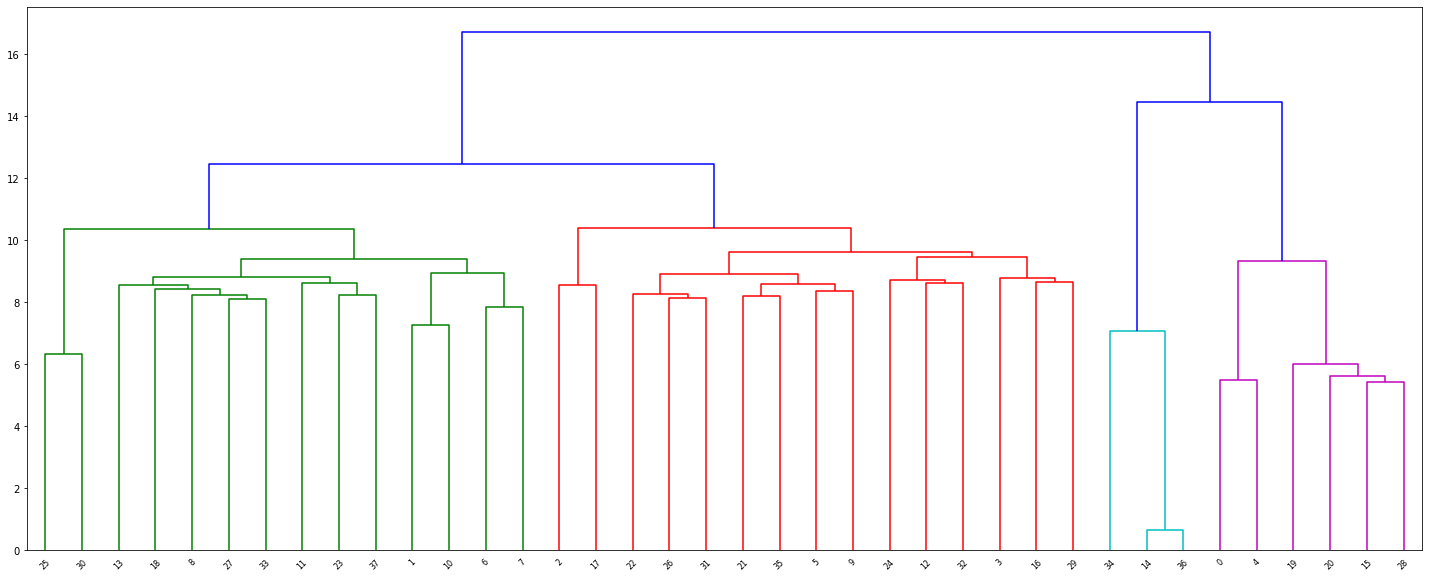

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)

In [ ]:
import pandas as pd
from datetime import datetime
# h=pd.date_range(start="2018-01-01",end="2020-12-31", freq='3H').to_pydatetime().tolist()
# h=h[:8756]
# h=pd.DataFrame(h)
# import numpy as np
# sam=np.load("/content/drive/MyDrive/Delhi Lockdown/DelhiData_3hr_sample_V9_Eju.npy")
# pm=sam[:,:,0]
# # pm
ar=pd.read_csv('/content/drive/MyDrive/Delhi_SAGNN_files/GNNDelhi/data/stn_coord.csv')
loc_b=pd.DataFrame(ar)

In [ ]:
ar

,id,stn_name,lat,lon
0,0,Alipur,28.815329,77.153010
1,1,Anand.Vihar,28.646835,77.316032
2,2,Ashok.Vihar,28.695381,77.181665
3,3,Aya.Nagar,28.470691,77.109936
4,4,Bawana,28.776200,77.051074
5,5,Burari.Crossing,28.725650,77.201157
6,6,CRRI.Mathura.Road,28.551201,77.273574
7,7,Dr..Karni.Singh.Shooting.Range,28.498571,77.264840
8,8,DTU,28.750050,77.111261
9,9,Dwarka,28.571027,77.071901


In [ ]:
pm=pd.DataFrame(pm)
pm.columns=loc_b['stn_name']

In [ ]:
pm.columns=loc_b['stn_name']

In [ ]:
pm

In [ ]:
a=np.linspace(1, 38,dtype = int, num=38)
a

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38])

In [ ]:
pm=pd.DataFrame(pm)
pm.columns=a

In [ ]:
pm

In [ ]:
pm = pd.to_numeric(pm)

TypeError: ignored

In [ ]:
# pm=pm.T

In [ ]:
co=pm.corr()

NameError: ignored

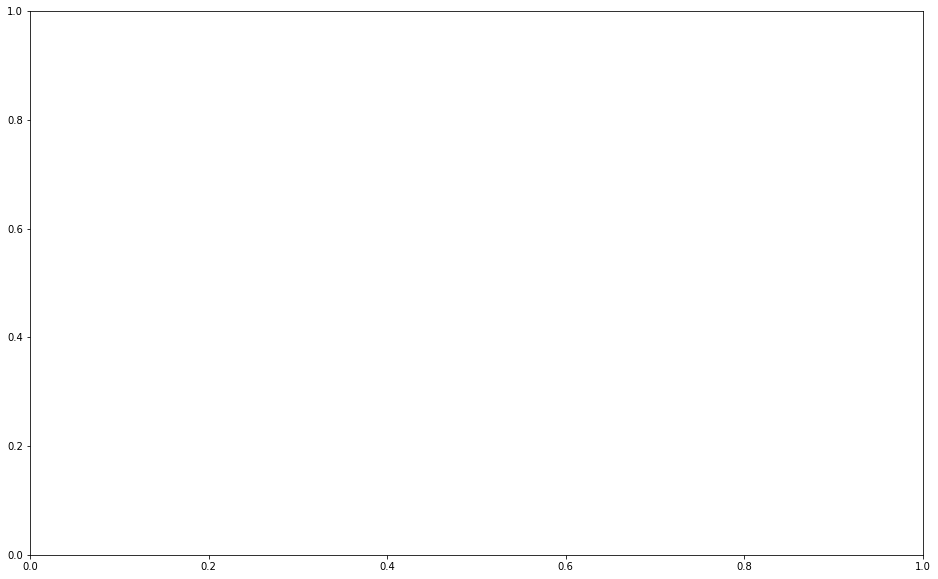

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#!pip install plotly
# import plotly.express as px
# import plotly.graph_objects as go
# from plotly.subplots import make_subplots
import numpy as np
# import datetime as dt
# from datetime import timedelta
# from sklearn.model_selection import GridSearchCV
# from sklearn.preprocessing import StandardScaler
# from sklearn.cluster import KMeans
# from sklearn.metrics import silhouette_score,silhouette_samples
# from sklearn.linear_model import LinearRegression,Ridge,Lasso
# from sklearn.svm import SVR
# from sklearn.metrics import mean_squared_error,r2_score
import statsmodels.api as sm
# from statsmodels.tsa.api import Holt,SimpleExpSmoothing,ExponentialSmoothing
# from fbprophet import Prophet
# from sklearn.preprocessing import PolynomialFeatures
# from statsmodels.tsa.stattools import adfuller
fig, ax = plt.subplots(figsize=(16,10))
snsplot=sns.heatmap(co,ax=ax)
fig = snsplot.get_figure()
fig.savefig("/content/drive/MyDrive/Delhi_Model_Results/corr1.png")


In [ ]:
fig.savefig("/content/drive/MyDrive/Delhi_Model_Results/corr.pdf")


In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=1000,n_init=10,random_state=32)
    kmeans.fit(pm)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
# plt.savefig("/content/drive/MyDrive/Delhi_Model_Results/elbow.pdf")
plt.show()

NameError: ignored

In [ ]:
# kmeans = KMeans(n_clusters=3,init='k-means++',max_iter=300,n_init=10,random_state=0) 
# y_kmeans = kmeans.fit_predict(pm)

pm= pm.as_matrix(columns=None)

AttributeError: ignored

In [ ]:
pm

,1,2,3,4,5,6,7,8,9,10,...,29,30,31,32,33,34,35,36,37,38
0,311.267760,754.0,139.792878,325.00,284.938872,172.150000,295.06,317.136795,381.00,268.651196,...,291.154397,234.080000,578.000000,195.253309,436.100000,425.0,201.537665,305.954204,225.840870,290.173992
1,291.251693,754.0,145.161783,240.65,254.243000,172.900000,330.39,325.366733,310.00,225.196653,...,277.556986,223.880000,578.000000,188.117688,433.500000,426.0,199.995885,307.359350,224.334341,275.422417
2,287.456695,754.0,141.572959,174.49,251.868466,157.040000,395.56,335.250892,299.50,240.238645,...,276.340627,212.340000,520.000000,174.985365,439.050000,520.5,194.193474,309.939406,221.072367,242.517311
3,280.069610,754.0,145.506031,146.37,241.873461,150.220000,461.26,351.922428,288.00,201.338468,...,262.945445,221.970000,520.000000,165.984094,442.300000,523.0,199.197558,298.955543,221.064415,227.415251
4,282.609754,868.0,147.412979,153.33,240.332270,172.010000,443.75,357.447002,265.00,224.673950,...,269.044595,229.800000,456.000000,161.830994,448.050000,462.5,201.782457,293.628858,223.019746,242.854080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52530,119.347373,217.0,45.687557,87.21,129.466972,87.536295,135.53,118.692063,151.45,257.183828,...,124.019261,103.710000,168.000000,116.815673,21.740000,149.0,117.387506,115.063136,116.655945,167.718082
52531,119.194401,219.5,46.209010,130.03,129.463377,87.593090,136.48,119.173424,151.00,248.334189,...,124.801967,111.010000,173.000000,90.008484,21.770000,149.0,119.100238,121.372639,118.361072,174.931930
52532,120.251073,222.0,44.510838,141.19,131.708258,86.620515,142.04,118.707909,158.00,240.481301,...,127.429890,120.910000,178.000000,125.302678,22.290000,161.0,120.524734,129.036515,120.759378,172.427930
52533,132.642038,211.0,133.839458,128.88,141.697726,123.725129,144.98,119.493523,158.10,257.665554,...,133.120670,136.568865,173.011619,127.821492,22.290000,163.0,125.498048,132.833336,125.513151,156.716101


In [ ]:
def doKmeans(X, nclust=8):
    model = KMeans(nclust)
    model.fit(X)
    clust_labels = model.predict(X)
    cent = model.cluster_centers_
    return (clust_labels, cent)

clust_labels, cent = doKmeans(pm, 3)
# kmeans = pd.DataFrame(clust_labels)
# print(kmeans)
pm["kmeans"]=clust_labels

In [ ]:
pm["kmeans"]

In [ ]:
s

In [ ]:
loc_b["kmeans"]=s

In [ ]:
loc_b

,id,stn_name,lat,lon,kmeans
0,0,Alipur,28.815329,77.153010,1.0
1,1,Anand.Vihar,28.646835,77.316032,0.0
2,2,Ashok.Vihar,28.695381,77.181665,1.0
3,3,Aya.Nagar,28.470691,77.109936,2.0
4,4,Bawana,28.776200,77.051074,2.0
5,5,Burari.Crossing,28.725650,77.201157,2.0
6,6,CRRI.Mathura.Road,28.551201,77.273574,0.0
7,7,Dr..Karni.Singh.Shooting.Range,28.498571,77.264840,2.0
8,8,DTU,28.750050,77.111261,0.0
9,9,Dwarka,28.571027,77.071901,1.0


In [ ]:
s

array([1., 0., 1., 2., 2., 2., 0., 2., 0., 1., 2., 2., 2., 0., 1., 1., 2.,
       1., 0., 1., 1., 1., 1., 0., 2., 2., 1., 0., 1., 2., 0., 1., 2., 0.,
       1., 1., 1., 2.])

In [ ]:
loc_b1=loc_b

In [ ]:
def regioncolors(counter):
    if counter['kmeans'] == 0:
        return 'green'
    elif counter['kmeans'] == 1:
        return 'blue'
    elif counter['kmeans'] == 2:
        return 'red'
    else:
        return 'darkblue'
loc_b1["color"] = loc_b1.apply(regioncolors, axis=1)
loc_b1.head()

,id,stn_name,lat,lon,kmeans,color
0,0,Alipur,28.815329,77.153010,1.0,blue
1,1,Anand.Vihar,28.646835,77.316032,0.0,green
2,2,Ashok.Vihar,28.695381,77.181665,1.0,blue
3,3,Aya.Nagar,28.470691,77.109936,2.0,red
4,4,Bawana,28.776200,77.051074,2.0,red


In [ ]:
ss=pm.groupby('kmeans').mean()


In [ ]:
ss

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,8715,8716,8717,8718,8719,8720,8721,8722,8723,8724,8725,8726,8727,8728,8729,8730,8731,8732,8733,8734,8735,8736,8737,8738,8739,8740,8741,8742,8743,8744,8745,8746,8747,8748,8749,8750,8751,8752,8753,8754
kmeans,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,279.799224,329.393682,244.410176,267.928416,284.215161,278.404815,312.698104,324.883568,313.617910,265.664857,237.947612,268.994892,307.559394,324.342313,340.628212,371.656582,242.744730,177.057856,178.972830,226.814167,256.863586,241.428237,280.640338,324.302437,326.444635,225.255394,153.496995,206.091296,276.728267,338.608086,328.050678,330.881151,249.117037,207.628885,194.414815,263.268212,312.487658,271.512400,283.922753,303.344786,...,199.073095,101.312137,73.882778,172.604259,257.639974,259.486481,239.988754,207.770926,227.153241,141.160556,105.814358,206.714586,318.256926,309.178922,288.914924,298.796629,330.466370,264.678565,165.870202,216.941111,139.012420,85.927405,115.296296,130.085741,92.644640,58.033457,39.477641,94.506761,146.002812,127.159597,117.702593,159.156757,152.747002,111.702966,95.795421,123.712037,158.068784,128.326667,127.226840,147.643977
1,230.001226,212.042136,174.340876,193.260476,179.994987,152.948578,181.867301,175.083744,150.105389,140.404025,135.576005,162.948263,169.111562,161.926473,185.091689,200.419236,141.446720,109.630467,119.182029,135.876877,149.092658,138.832146,171.993840,191.708783,170.695613,117.237940,110.952448,138.289517,150.801723,170.312596,202.224521,208.231986,159.253673,131.208064,134.729408,164.613608,180.282379,164.124432,199.406725,191.987706,...,149.515284,88.747156,71.913080,127.847321,166.704109,157.701679,140.136492,139.998909,143.363222,96.444278,81.541414,150.455214,218.135482,191.822285,164.594935,178.815430,181.478642,130.975017,100.548691,143.630336,136.571918,120.801506,114.276389,121.006320,105.367796,74.328976,64.065902,102.805790,131.581204,120.032431,109.721380,126.311896,125.084372,87.141548,79.839537,116.028235,125.769857,123.556181,108.675888,115.573055
2,257.780993,271.301042,180.359903,207.447229,236.328212,213.682049,249.379325,262.819370,222.451085,218.021494,210.364024,229.595478,224.606799,216.698793,216.683691,248.234571,177.886141,128.368009,133.099761,159.700870,193.075317,188.394387,220.034168,223.546845,196.695769,134.426106,101.741524,147.776978,192.338105,250.359006,248.446105,230.078650,178.569801,154.423348,140.607703,192.253561,218.695529,205.602600,238.412741,239.340160,...,158.399209,93.297565,68.984827,128.129706,191.375088,196.735762,167.766910,149.941824,159.301718,105.796534,85.535799,154.749996,243.334463,230.024336,206.234992,211.768550,220.117389,171.132332,130.108087,168.446168,117.002158,92.697818,100.556946,114.370129,93.128782,61.277920,48.979851,81.702467,125.394469,111.065359,102.707193,123.890509,128.063492,95.108145,72.247050,91.921275,110.952227,105.030380,97.477937,109.671962


In [ ]:
sns.catplot(x='kmeans', data=pm, kind='bar');


In [ ]:
Cluster0=np.where(pm["kmeans"]==0)
Cluster1=np.where(pm["kmeans"]==1)
Cluster2=np.where(pm["kmeans"]==2)


In [ ]:
Cluster0

(array([ 1,  6,  8, 13, 27, 30]),)

In [ ]:
np.save("/content/drive/MyDrive/Delhi_Model_Results/Cluster0.npy", Cluster0)
np.save("/content/drive/MyDrive/Delhi_Model_Results/Cluster1.npy", Cluster1)
np.save("/content/drive/MyDrive/Delhi_Model_Results/Cluster2.npy", Cluster2)

In [ ]:
import numpy as np

c0=np.load("/content/drive/MyDrive/Delhi_Model_Results/Cluster0.npy")
c1=np.load("/content/drive/MyDrive/Delhi_Model_Results/Cluster1.npy")
c2=np.load("/content/drive/MyDrive/Delhi_Model_Results/Cluster2.npy")

In [ ]:
c0

array([[ 1,  6,  8, 13, 18, 23, 27, 30, 33]])

In [ ]:
asa =np.asarray(pm.mean(axis=1))

In [ ]:
asa=pd.DataFrame(asa)
# asa.columns=loc_b['stn_name']

In [ ]:
asa=asa.T

In [ ]:
asa.columns=loc_b['stn_name']

In [ ]:
asa.loc[c0]

ValueError: ignored

In [ ]:
asa[c0]

KeyError: ignored

In [ ]:
asa[c1]

array([[80.61306864, 58.28471089, 88.24515628, 76.24831605, 77.60086404,
        47.70423132, 79.18128444, 78.85222883, 79.90598899, 69.44122638,
        74.01385133, 75.64219073, 65.35659063, 74.90098222, 88.6950664 ,
        76.23246993]])

In [ ]:
asa[c2]

array([[ 83.08525332,  85.16987641,  86.41157745,  92.54242303,
         85.24519775,  83.83911926,  97.87241699,  84.07699655,
        101.77822099,  89.94066349,  78.738861  , 100.05219812,
         93.20748099]])

In [ ]:
c0=np.squeeze(c0)
c1=np.squeeze(c1)
c2=np.squeeze(c2)


In [ ]:
c2.shape

(13,)

In [ ]:
s=np.zeros(38)
# s[c0]==0
# s[c1]==1
# s[c2]==2
# s

In [ ]:
a0=np.zeros(9)
a1=np.repeat(1,16)
a2=np.repeat(2,13)

In [ ]:
aa=np.concatenate((a0,a1,a2))

In [ ]:
aa

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2.])

In [ ]:
ss=np.concatenate((c0,c1,c2))

In [ ]:
s[ss]=aa

In [ ]:
c2

array([ 3,  4,  5,  7, 10, 11, 12, 16, 24, 25, 29, 32, 37])

In [ ]:
s

array([1., 0., 1., 2., 2., 2., 0., 2., 0., 1., 2., 2., 2., 0., 1., 1., 2.,
       1., 0., 1., 1., 1., 1., 0., 2., 2., 1., 0., 1., 2., 0., 1., 2., 0.,
       1., 1., 1., 2.])

In [ ]:
s=np.concatenate((c0,c1,c2),axis=1)
s=np.squeeze(s)
ss=np.argsort(s)

In [ ]:
ss

array([ 9,  0, 10, 25, 26, 27,  1, 28,  2, 11, 29, 30, 31,  3, 12, 13, 32,
       14,  4, 15, 16, 17, 18,  5, 33, 34, 19,  6, 20, 35,  7, 21, 36,  8,
       22, 23, 24, 37])

In [ ]:
loc_b1

,id,stn_name,lat,lon,kmeans,color
0,0,Alipur,28.815329,77.153010,0,green
1,1,Anand.Vihar,28.646835,77.316032,2,red
2,2,Ashok.Vihar,28.695381,77.181665,0,green
3,3,Aya.Nagar,28.470691,77.109936,1,blue
4,4,Bawana,28.776200,77.051074,0,green
5,5,Burari.Crossing,28.725650,77.201157,0,green
6,6,CRRI.Mathura.Road,28.551201,77.273574,2,red
7,7,Dr..Karni.Singh.Shooting.Range,28.498571,77.264840,1,blue
8,8,DTU,28.750050,77.111261,2,red
9,9,Dwarka,28.571027,77.071901,0,green


In [ ]:
locations=loc_b1[['lat','lon']]
locationlist = locations.values.tolist()
len(locationlist)
locationlist[7]

[28.498571000000002, 77.26484]

In [ ]:
import folium 
from folium import plugins
from folium.plugins import HeatMap, HeatMapWithTime
# affected_area = folium.Map(location=[loc_b1.lat, loc_b1.lon], zoom_start=14,max_zoom=4,min_zoom=3,
#                           tiles='cartodbpositron',height = 500,width = '70%')
# HeatMap(data=first_month[['latitude','longitude','pm25']].groupby(['latitude','longitude']).sum().reset_index().values.tolist(),
#         radius=18, max_zoom=14).add_to(affected_area)
# affected_area

In [ ]:
map = folium.Map(location=[28.498571000000002, 77.26484], zoom_start=12,tiles = 'Stamen Toner')
for point in range(0, 38):
    folium.Marker(locationlist[point], popup='ID:'+str(loc_b1['id'][point])+' '+loc_b1['stn_name'][point], icon=folium.Icon(color=loc_b1["color"][point], icon_color='white', icon='male', angle=0, prefix='fa')).add_to(map)
map

In [ ]:
affected_area

In [ ]:
!pip install pyproj

     |████████████████████████████████| 6.6 MB 4.2 MB/s 


In [ ]:
!pip install geos


     |████████████████████████████████| 400 kB 4.2 MB/s 


In [ ]:
conda install basemap

SyntaxError: ignored

In [ ]:
import mpl_toolkits
mpl_toolkits.__path__.append('/usr/lib/python2.7/dist-packages/mpl_toolkits/')
from mpl_toolkits.basemap import Basemap

ModuleNotFoundError: ignored

In [ ]:
import sys
from mpl_toolkits.basemap import Basemap
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution=None,
            width=8E6, height=8E6, 
            lat_0=45, lon_0=-100,)
m.etopo(scale=0.5, alpha=0.5)

# Map (long, lat) to (x, y) for plotting
x, y = m(-122.3, 47.6)
plt.plot(x, y, 'ok', markersize=5)
plt.text(x, y, ' Seattle', fontsize=12);

ModuleNotFoundError: ignored

In [ ]:
pm=np.asarray(pm)

In [ ]:
pmc0=np.squeeze(pm[:,c0])
pmc1=np.squeeze(pm[:,c1])
pmc2=np.squeeze(pm[:,c2])

In [ ]:
np.mean(pmc0)

107.16336380518527

In [ ]:
pmc0=np.ndarray.flatten(pmc0)
pmc1=np.ndarray.flatten(pmc1)
pmc2=np.ndarray.flatten(pmc2)


In [ ]:
data=[pmc0,pmc1,pmc2]

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


{'boxes': [<matplotlib.lines.Line2D at 0x7f4f18ba5dd0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f4f18bb1e50>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f4f18bb7b90>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f4f18bb7650>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f4f18bb13d0>,
  <matplotlib.lines.Line2D at 0x7f4f18083250>]}

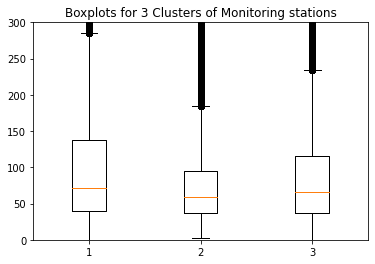

In [ ]:
import matplotlib.pyplot as plt
fig2, ax2 = plt.subplots()
ax2.set_title('Boxplots for 3 Clusters of Monitoring stations')
ax2.set_ylim([0,300])
ax2.boxplot(data)

In [ ]:
m0=np.mean(pmc0)
m1=np.mean(pmc1)
m2=np.mean(pmc2)
s0=np.std(pmc0)
s1=np.std(pmc1)
s2=np.std(pmc2)

In [ ]:
print(m0,m1,m2,s0,s1,s2)

107.16336380518527 74.43238919230541 89.38156041305025 104.56732584962866 55.28688067895291 79.03117739288625


In [ ]:
fig2.savefig("plot.pdf")

In [ ]:
MN=np.mean(pm.T,axis=1)

In [ ]:
SD=np.std(pm.T,axis=1)

In [ ]:
SD

array([ 61.54643131, 122.51995719,  60.13335741,  79.29791985,
        67.6801872 ,  88.37952846, 100.08572735,  72.80285001,
       113.2197633 ,  69.18807382,  68.52628752,  82.1356729 ,
        85.79758728,  99.51130273,  47.90587652,  54.72237123,
        74.85309776,  29.19085604,  91.59996239,  56.72579865,
        57.20626974,  56.12633511,  56.00763613,  97.44307144,
        76.31265369,  77.90745199,  52.61468208, 116.89437123,
        52.24590577,  79.0982853 ,  98.0086476 ,  41.92550037,
        87.19554104,  94.46956274,  46.6122858 ,  66.8600238 ,
        47.87758584,  80.23683036])

In [ ]:
A=pd.DataFrame(loc_b['lon'], loc_b['lat'])

In [ ]:
A

In [ ]:
from sklearn.cluster import DBSCAN
clustering = DBSCAN(eps=9000, min_samples=3).fit(pm.T)

In [ ]:
clustering.labels_

array([ 0, -1, -1, -1,  0, -1,  0,  0, -1,  0,  0, -1, -1, -1,  0,  0, -1,
        0, -1,  0,  0,  0,  0, -1, -1,  0,  0, -1,  0, -1,  0,  0, -1, -1,
        0,  0,  0,  0])

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install libtiff

In [ ]:
from PIL import Image
im = Image.open('/content/drive/MyDrive/Delhi/sdat_1336_1_20211008_044623705.tif')
im.show()

In [ ]:
from skimage import io
import matplotlib.pyplot as plt

# read the image stack
img = io.imread('/content/drive/MyDrive/Delhi/sdat_1336_1_20211008_044623705.tif')
# show the image
plt.imshow(mol,cmap='gray')

ValueError: ignored